<a href="https://colab.research.google.com/github/Khushangz/Predicting_Price_using_ExtraTreesRegressor/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Veltris/Feature_selection and tuning/train_v9rqX0R.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Outlet_Size'])


In [ ]:
print(df_encoded["Outlet_Size_High"])

0       0
1       0
2       0
3       0
4       1
       ..
8518    1
8519    0
8520    0
8521    0
8522    0
Name: Outlet_Size_High, Length: 8523, dtype: uint8


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Initialize the imputer
f_encoded = df_encoded
imputer = IterativeImputer(max_iter=20, random_state=0)
f_imputed = imputer.fit_transform(f_encoded.select_dtypes(include=['float64', 'int64']))
f_imputed = pd.DataFrame(f_imputed, columns=f_encoded.select_dtypes(include=['float64', 'int64']).columns)
df_imputed = pd.concat([f_imputed, f_encoded.select_dtypes(exclude=['float64', 'int64'])], axis=1)
df_imputed.isnull().sum()


Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
Item_Identifier              0
Item_Fat_Content             0
Item_Type                    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Type                  0
Outlet_Size_High             0
Outlet_Size_Medium           0
Outlet_Size_Small            0
dtype: int64

In [ ]:
pip install mlxtend

<ipython-input-8-b423d681ff01>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMat = df_imputed.corr()


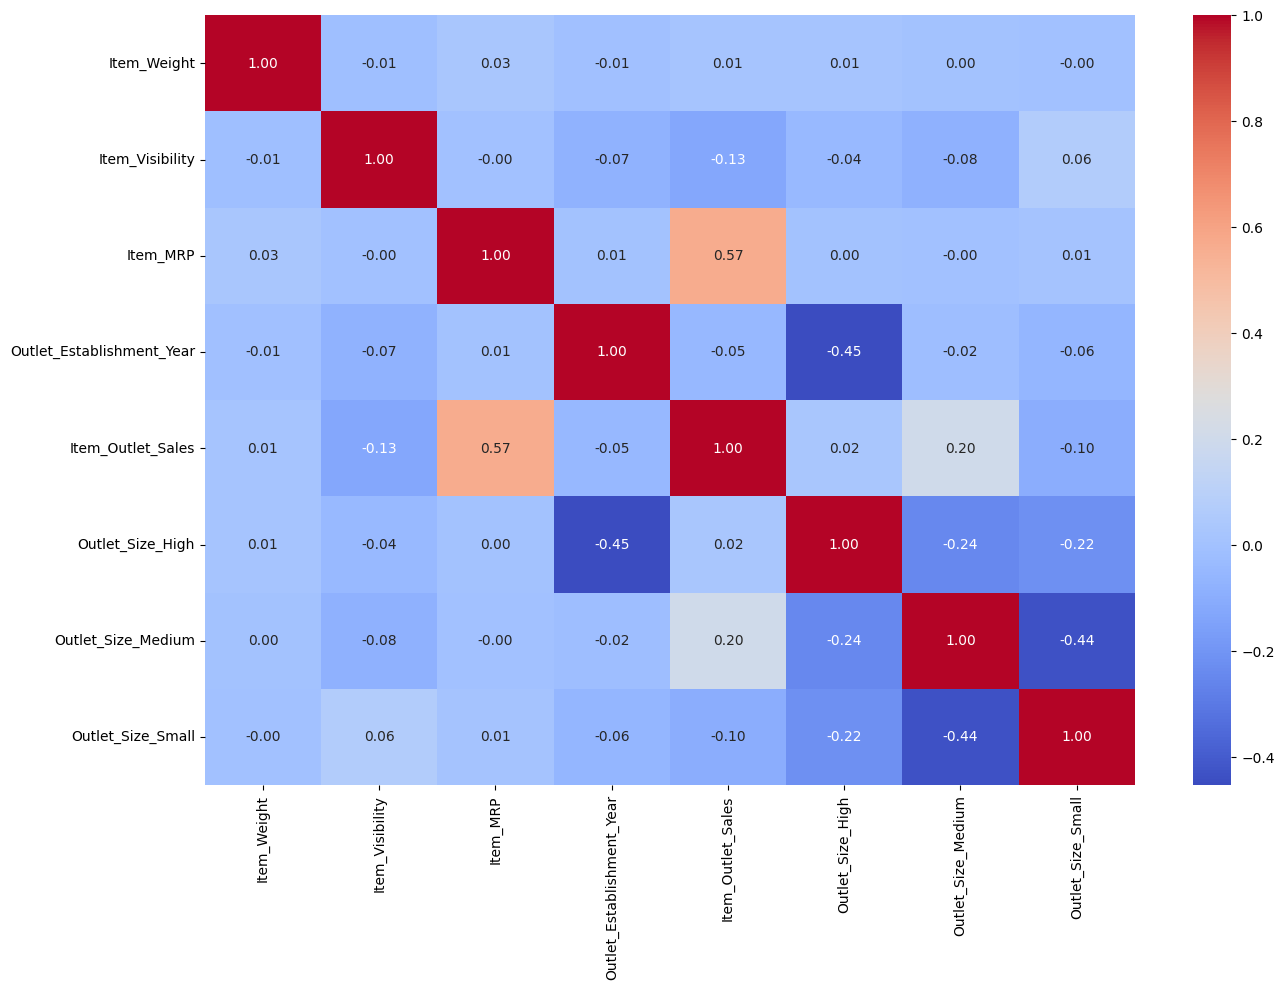

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corrMat = df_imputed.corr()

# Plot the heatmap
plt.figure(figsize=(15,10))  # Corrected typo here
sns.heatmap(corrMat, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [ ]:
y=df["Item_Outlet_Sales"]
df.drop("Item_Outlet_Sales",axis=1,inplace=True)
X=df


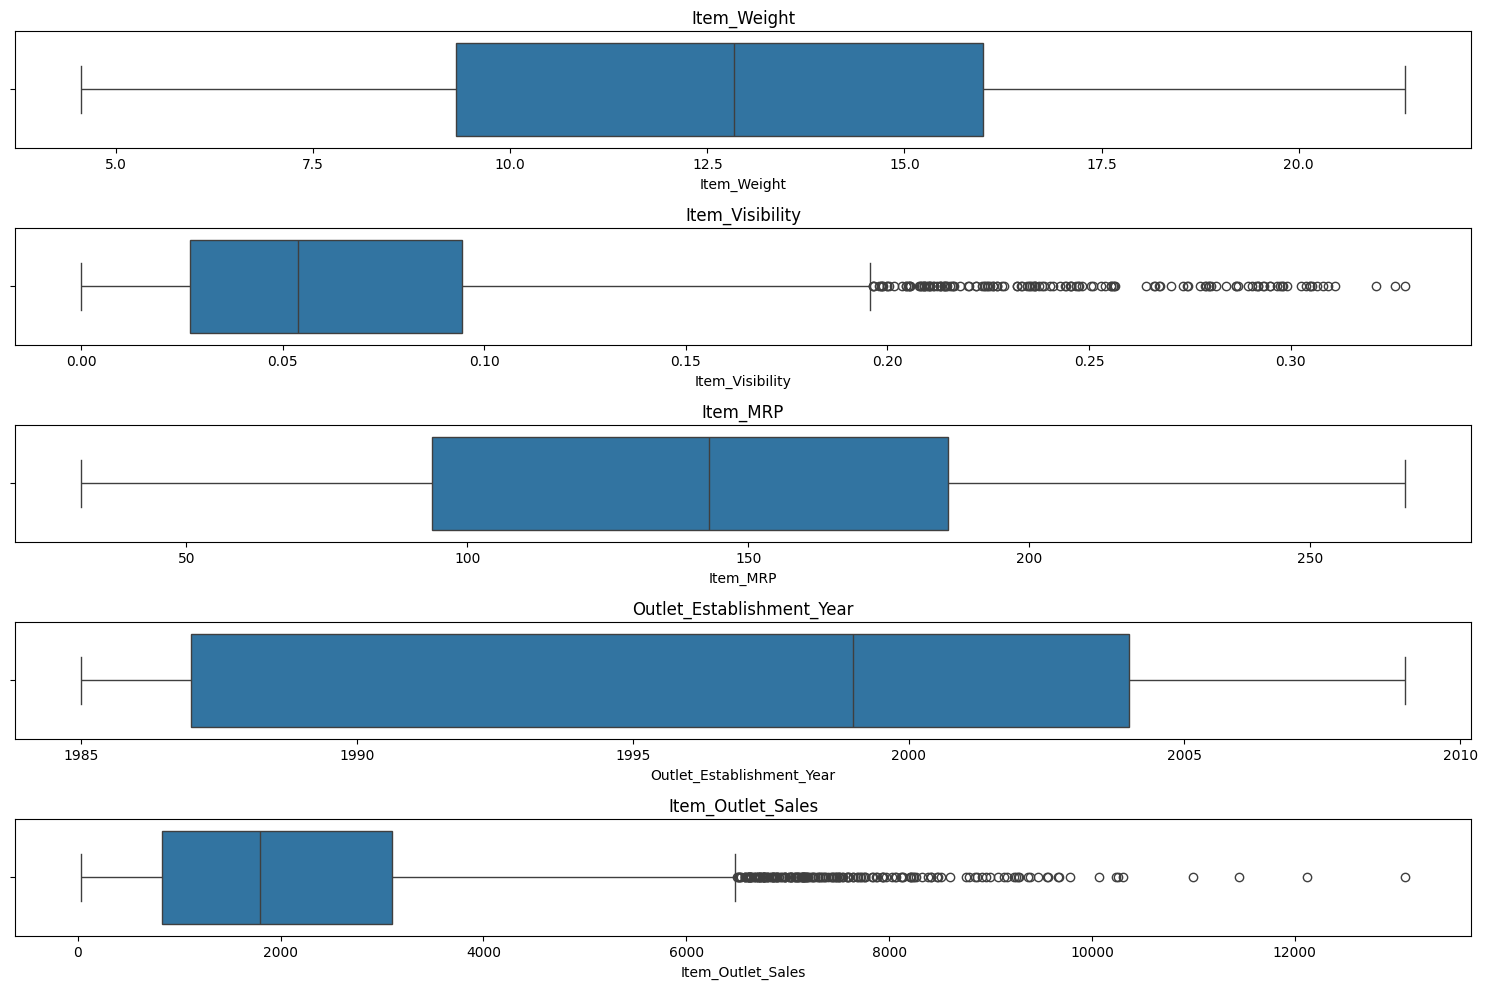

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
numerical_columns = df_imputed.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)
    sns.boxplot(x=df_imputed[col])
    plt.title(col)
plt.tight_layout()
plt.show()

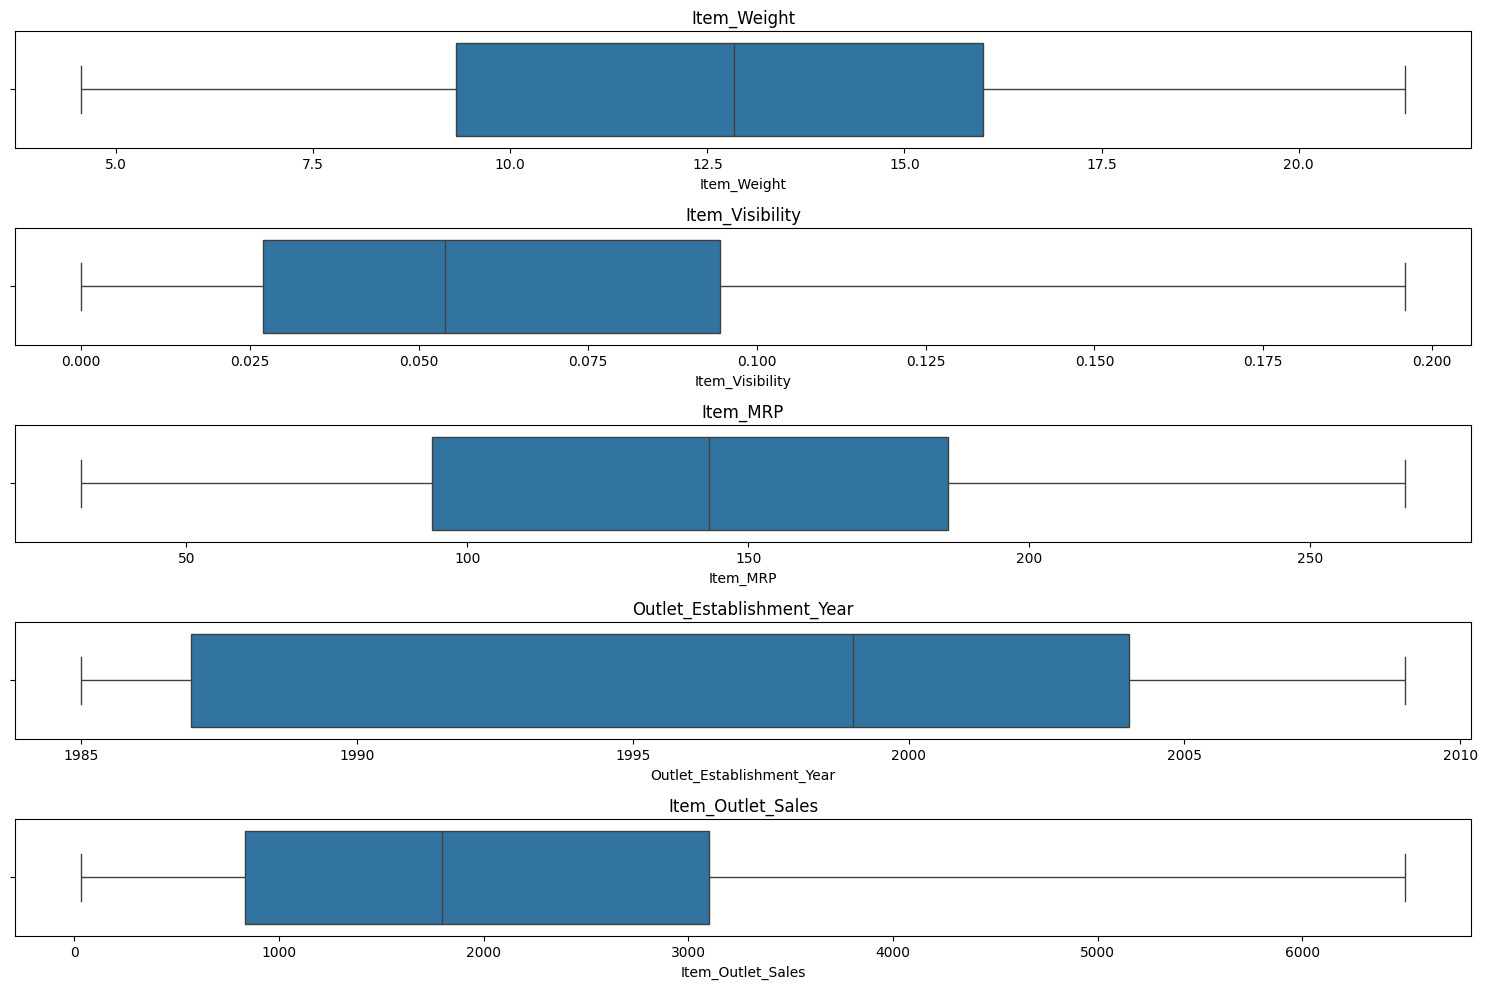

In [ ]:
import numpy as np
df_capped = df_imputed.copy()
numerical_columns = df_imputed.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    Q1 = df_imputed[col].quantile(0.25)
    Q3 = df_imputed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
    df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)
    sns.boxplot(x=df_capped[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
X=df

In [ ]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.4 MB/s eta

In [ ]:
import pandas as pd
df=pd.read_csv("/content/train.csv")
df["Item_Outlet_Sales"].isnull().sum()

0

In [ ]:
df["Item_Outlet_Sales"]=y

In [ ]:
from pycaret.regression import *
setup_data = setup(data = df, target = '', fold=5)

,Description,Value
0,Session id,5044
1,Target,Item_Outlet_Sales
2,Target type,Regression
3,Original data shape,"(8523, 12)"
4,Transformed data shape,"(8523, 47)"
5,Transformed train set shape,"(5966, 47)"
6,Transformed test set shape,"(2557, 47)"
7,Numeric features,4
8,Categorical features,7
9,Rows with missing values,45.4%


In [ ]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,879.5104,1597227.2549,1263.4915,0.4567,0.6103,0.6246,1.8900
lightgbm,Light Gradient Boosting Machine,889.8484,1662116.3631,1288.6921,0.4348,0.6014,0.6175,2.3640
rf,Random Forest Regressor,903.2757,1687643.2792,1298.6209,0.4260,0.6070,0.6155,5.1120
lr,Linear Regression,963.3532,1717020.3723,1310.0797,0.4158,0.7777,1.0412,2.9400
ridge,Ridge Regression,963.4451,1717525.7723,1310.2721,0.4156,0.7762,1.0411,0.4420
lasso,Lasso Regression,963.7771,1720136.5832,1311.2665,0.4148,0.7728,1.0394,0.3560
et,Extra Trees Regressor,912.5105,1722003.2939,1311.8617,0.4142,0.6103,0.6181,3.9700
llar,Lasso Least Angle Regression,964.4851,1722871.2111,1312.2875,0.4138,0.7741,1.0393,0.2520
br,Bayesian Ridge,964.8228,1724362.0361,1312.8733,0.4133,0.7745,1.0392,0.2420
xgboost,Extreme Gradient Boosting,925.1878,1785627.5500,1335.9581,0.3925,0.6730,0.6425,1.0660


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)


In [ ]:
y=df["Item_Outlet_Sales"]
X=df.drop("Item_Outlet_Sales",axis=1,inplace=True)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)


In [ ]:
df_capped["Item_Outlet_Sales"]=y
from pycaret.regression import *
setup_data2 = setup(data = df_capped, target = 'Item_Outlet_Sales')

,Description,Value
0,Session id,4596
1,Target,Item_Outlet_Sales
2,Target type,Regression
3,Original data shape,"(8523, 14)"
4,Transformed data shape,"(8523, 47)"
5,Transformed train set shape,"(5966, 47)"
6,Transformed test set shape,"(2557, 47)"
7,Numeric features,7
8,Categorical features,6
9,Preprocess,True


In [ ]:
df_capped.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
Item_Identifier              0
Item_Fat_Content             0
Item_Type                    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Type                  0
Outlet_Size_High             0
Outlet_Size_Medium           0
Outlet_Size_Small            0
dtype: int64

In [ ]:
best_model2 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,845.1340,1492679.9027,1221.2498,0.4802,0.5835,0.5917,0.6860
gbr,Gradient Boosting Regressor,851.4959,1498788.2385,1223.6707,0.4784,0.5913,0.6011,1.1870
rf,Random Forest Regressor,860.0690,1543975.9406,1241.9619,0.4625,0.5857,0.5857,3.7440
et,Extra Trees Regressor,867.0261,1574026.8994,1254.0586,0.4519,0.5891,0.5882,3.0450
xgboost,Extreme Gradient Boosting,882.9275,1610118.3125,1268.3944,0.4387,0.6538,0.6205,0.3740
lr,Linear Regression,940.7007,1643448.6130,1281.2650,0.4286,0.7734,1.0435,0.1880
ridge,Ridge Regression,940.7503,1643790.3540,1281.3979,0.4285,0.7725,1.0433,0.1820
lasso,Lasso Regression,940.8649,1646111.0818,1282.2965,0.4277,0.7778,1.0424,0.2250
br,Bayesian Ridge,941.5643,1648713.7319,1283.3123,0.4268,0.7766,1.0412,0.1890
llar,Lasso Least Angle Regression,943.7847,1658390.3873,1286.9505,0.4235,0.7784,1.0446,0.2260


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:

categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Column: {col}")
    print(df[col].value_counts(normalize=True))  # Shows the percentage of each category
    print("\n")



Column: Item_Identifier
FDW13    0.001173
FDG33    0.001173
NCY18    0.001056
FDD38    0.001056
DRE49    0.001056
           ...   
FDY43    0.000117
FDQ60    0.000117
FDO33    0.000117
DRF48    0.000117
FDC23    0.000117
Name: Item_Identifier, Length: 1559, dtype: float64


Column: Item_Fat_Content
Low Fat    0.597090
Regular    0.338965
LF         0.037076
reg        0.013728
low fat    0.013141
Name: Item_Fat_Content, dtype: float64


Column: Item_Type
Fruits and Vegetables    0.144550
Snack Foods              0.140795
Household                0.106770
Frozen Foods             0.100434
Dairy                    0.080019
Canned                   0.076147
Baking Goods             0.076030
Health and Hygiene       0.061011
Soft Drinks              0.052212
Meat                     0.049865
Breads                   0.029450
Hard Drinks              0.025109
Others                   0.019829
Starchy Foods            0.017365
Breakfast                0.012906
Seafood                  0.007

In [ ]:


df_capped["Item_Outlet_Sales"]=y




RMSE: 1013.8646837547267


In [ ]:
df_encoded["Item_Sold_outlet"]=df_encoded["Item_Outlet_Sales"]/df_encoded["Item_MRP"]

In [ ]:

from pycaret.regression import *
setup_data = setup(data = df_encoded, target = 'Item_Outlet_Sales')

,Description,Value
0,Session id,8830
1,Target,Item_Outlet_Sales
2,Target type,Regression
3,Original data shape,"(8523, 1606)"
4,Transformed data shape,"(8523, 1606)"
5,Transformed train set shape,"(5966, 1606)"
6,Transformed test set shape,"(2557, 1606)"
7,Numeric features,1605
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model2 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,16.1351,3271.2352,48.9168,0.9989,0.0176,0.0087,27.8660
lightgbm,Light Gradient Boosting Machine,33.5395,4743.3292,64.5043,0.9984,0.0399,0.0233,1.1280
rf,Random Forest Regressor,25.8958,4970.0313,64.2300,0.9983,0.0257,0.0144,18.8570
xgboost,Extreme Gradient Boosting,46.6439,7177.9421,82.9170,0.9975,0.0542,0.0315,3.9300
gbr,Gradient Boosting Regressor,58.8687,7723.7386,85.8068,0.9974,0.1956,0.0599,11.4430
dt,Decision Tree Regressor,54.0658,12299.6587,108.9838,0.9959,0.0472,0.0281,0.6330
knn,K Neighbors Regressor,136.3202,45871.7816,213.3837,0.9843,0.2001,0.1254,0.8700
ada,AdaBoost Regressor,339.4760,168071.6819,409.7066,0.9422,0.5223,0.5594,17.1950
en,Elastic Net,385.5668,326738.3375,571.0398,0.8878,0.6727,0.8116,0.3840
llar,Lasso Least Angle Regression,386.0294,327426.0344,571.6300,0.8876,0.6804,0.8162,0.7270


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
X=df_encoded

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

# Initialize the Extra Trees Regressor
etr = ExtraTreesRegressor()

# Setup RandomizedSearchCV
grid_search = GridSearchCV(
    estimator=ExtraTreesRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit RandomizedSearchCV
grid_search.fit(X_train, y_train)
# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")


# Best parameters
print("Best Parameters:", etr_random.best_params_)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = etr_random.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")


In [ ]:
X.head()

In [ ]:
X.isnull().sum()